In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
text = pd.read_csv("train.csv")

Data Cleaning

In [10]:
text.drop(columns=["id","author"],axis=1,inplace=True)

In [11]:
text.head()

,text
0,"This process, however, afforded me no means of..."
1,It never once occurred to me that the fumbling...
2,"In his left hand was a gold snuff box, from wh..."
3,How lovely is spring As we looked from Windsor...
4,"Finding nothing else, not even gold, the Super..."


In [14]:
import re

# Removing Puctuations
text["PreProcessed"] = text["text"].map(lambda x: re.sub('[,\.!?]','',x))

# Convert the texts into lowercase
text["PreProcessed"] = text["PreProcessed"].map(lambda x: x.lower())

In [15]:
text.head()

,text,PreProcessed
0,"This process, however, afforded me no means of...",this process however afforded me no means of a...
1,It never once occurred to me that the fumbling...,it never once occurred to me that the fumbling...
2,"In his left hand was a gold snuff box, from wh...",in his left hand was a gold snuff box from whi...
3,How lovely is spring As we looked from Windsor...,how lovely is spring as we looked from windsor...
4,"Finding nothing else, not even gold, the Super...",finding nothing else not even gold the superin...


# Visualization

In [17]:
# from wordcloud import wordcloud

text["PreProcessed"].values

array(['this process however afforded me no means of ascertaining the dimensions of my dungeon; as i might make its circuit and return to the point whence i set out without being aware of the fact; so perfectly uniform seemed the wall',
       'it never once occurred to me that the fumbling might be a mere mistake',
       'in his left hand was a gold snuff box from which as he capered down the hill cutting all manner of fantastic steps he took snuff incessantly with an air of the greatest possible self satisfaction',
       ...,
       'mais il faut agir that is to say a frenchman never faints outright',
       'for an item of news like this it strikes us it was very coolly received"',
       'he laid a gnarled claw on my shoulder and it seemed to me that its shaking was not altogether that of mirth'],
      dtype=object)

In [18]:
!pip install wordcloud

     |████████████████████████████████| 368kB 352kB/s eta 0:00:01


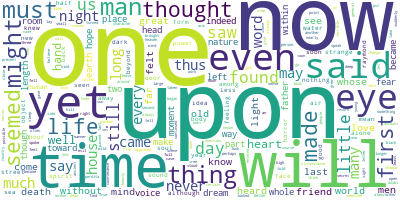

In [21]:
from wordcloud import WordCloud
# Simply joining all the texts
completeText = ",".join(list(text["PreProcessed"].values))

# Creating a wordcloud object
wordcloud = WordCloud(background_color = "white",max_words=1000,contour_width=3,contour_color="green")

# Now generating a wordcloud
wordcloud.generate(completeText)

# Visualizing the cloud generated
wordcloud.to_image()

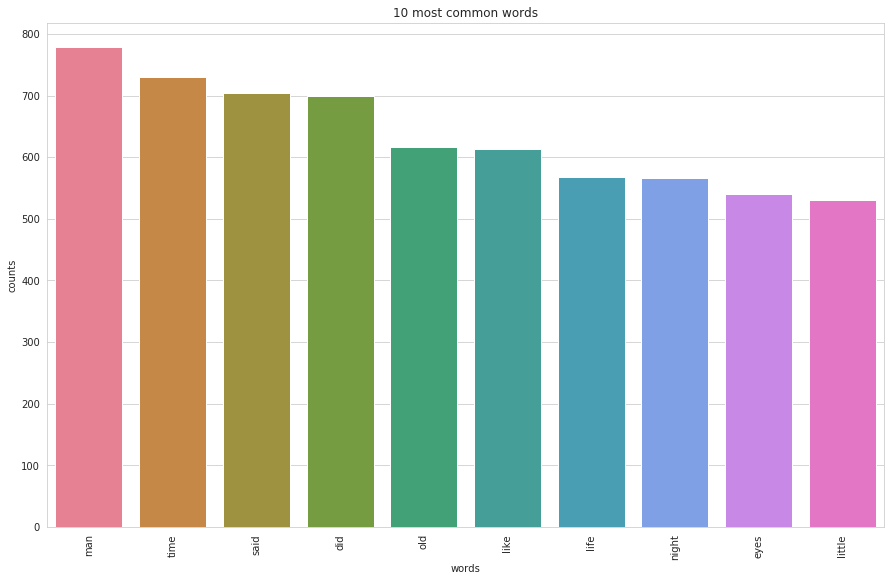

In [22]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(text["PreProcessed"])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [23]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
did time house like thought old years mind eyes door

Topic #1:
night man saw came light day like earth did away

Topic #2:
know head thing say little life man said human time

Topic #3:
said time life raymond old eyes man little shall did

Topic #4:
great like did time old long day place soon things


In [25]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 117kB/s eta 0:00:01
     |████████████████████████████████| 552kB 123kB/s eta 0:00:01
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=bc1e001d7c3d3bd9c0950c6386f3c438831c0c90bbb58a7b79b217645f6642aa
  Stored in directory: /home/prajwol/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32040 sha256=9a3c7bfb21953d015474ea7004e045a33dd57dc1395ea406d1e87135cec5b0dc
  Stored in directory: /home/prajwol/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
%%time

from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = True
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:

    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

    with open(LDAvis_data_filepath, 'w') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

LDAvis_prepared